In [1]:

import pandas as pd
import numpy as np
import sklearn as sk
import math

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score

import itertools


# Import data 

In [2]:
# Read data from CSV file:
df = pd.read_csv(r'.\Covid_Diagnosis.csv')
#df.head()
print("The number of rows after handling missing values = ",df.shape[0])
print("The number of columns after handling missing values = ",df.shape[1])

The number of rows after handling missing values =  5644
The number of columns after handling missing values =  111


# Handle missing values

In [3]:
# Drop cols with all missing values

A = df.columns.values.tolist()
df.dropna(axis=1, how='all', thresh=None, subset=None, inplace=True)
B = df.columns.values.tolist()

# Columns with all missing data are:
print("Columns that have no data at all and therefore dropped are: ")
print(set(A).difference(set(B)))
print("No. of columns dropped = ", len(set(A).difference(set(B))))

Columns that have no data at all and therefore dropped are: 
{'d_dimer', 'mycoplasma_pneumoniae', 'partial_thromboplastin_time_ptt', 'urine_sugar', 'prothrombin_time_pt_activity'}
No. of columns dropped =  5


In [4]:
# Drop cols with more than 95% missing values
A = df.columns.values.tolist()
df.dropna(axis=1, how='all', thresh=0.05*df.shape[0], subset=None, inplace=True)
B = df.columns.values.tolist()

# Columns with more than 95%  missing data are:
print("Columns that have 95% missing rows and therefore dropped are: ")
print(set(A).difference(set(B)))
print("No. of columns dropped = ", len(set(A).difference(set(B))))

Columns that have 95% missing rows and therefore dropped are: 
{'ph_arterial_blood_gas_analysis', 'pco2_arterial_blood_gas_analysis', 'gamma_glutamyltransferase', 'segmented', 'ferritin', 'myelocytes', 'total_co2_venous_blood_gas_analysis', 'creatine_phosphokinase_cpk', 'urine_bile_pigments', 'myeloblasts', 'urine_ph', 'phosphor', 'total_co2_arterial_blood_gas_analysis', 'metamyelocytes', 'relationship_patient_normal', 'urine_hemoglobin', 'international_normalized_ratio_inr', 'po2_venous_blood_gas_analysis', 'serum_glucose', 'aspartate_transaminase', 'urine_hyaline_cylinders', 'urine_aspect', 'hco3_venous_blood_gas_analysis', 'urine_ketone_bodies', 'promyelocytes', 'urine_urobilinogen', 'vitamin_b12', 'urine_granular_cylinders', 'magnesium', 'base_excess_venous_blood_gas_analysis', 'cto2_arterial_blood_gas_analysis', 'lactic_dehydrogenase', 'hb_saturation_arterial_blood_gases', 'total_bilirubin', 'urine_red_blood_cells', 'urine_yeasts', 'urine_leukocytes', 'alkaline_phosphatase', 'ph_v

In [5]:
# Replace Missing values (NaN) with 0

df.fillna(0,inplace=True)
df.head()

print("The number of rows after handling missing values = ",df.shape[0])
print("The number of columns after handling missing values = ",df.shape[1])

The number of rows after handling missing values =  5644
The number of columns after handling missing values =  46


# Datatypes & Conversions

In [6]:
# Figure out the datatypes for each column

df_dtypes = pd.DataFrame(df.dtypes,columns=['data_type'])
df_dtypes = df_dtypes.reset_index()
df_dtypes['column_name'] = df_dtypes['index']
df_dtypes = df_dtypes[['column_name','data_type']]
df_dtypes

,column_name,data_type
0,patient_id,object
1,patient_age_quantile,int64
2,sars_cov_2_exam_result,object
3,patient_addmited_to_regular_ward_1_yes_0_no,object
4,patient_addmited_to_semi_intensive_unit_1_yes_...,object
5,patient_addmited_to_intensive_care_unit_1_yes_...,object
6,hematocrit,float64
7,hemoglobin,float64
8,platelets,float64
9,mean_platelet_volume,float64


In [7]:
#Convert all objects to categorical data first using astype('category')
for index, row in df_dtypes.iterrows():
    if(row['data_type'] == 'object'):
        if(row['column_name'] != 'patient_id'):
            df[row['column_name']] = df[row['column_name']].astype('category').cat.codes

# Q: Should patient_id be converted to a numerical value? What would happen if you did that? Would it help? 
# A: It need not be converted as it is not a feature for the prediction.

# Let's check the data types now:
df_dtypes = pd.DataFrame(df.dtypes,columns=['data_type'])
df_dtypes = df_dtypes.reset_index()
df_dtypes['column_name'] = df_dtypes['index']
df_dtypes = df_dtypes[['column_name','data_type']]
print(df_dtypes)

                                          column_name data_type
0                                          patient_id    object
1                                patient_age_quantile     int64
2                              sars_cov_2_exam_result      int8
3         patient_addmited_to_regular_ward_1_yes_0_no      int8
4   patient_addmited_to_semi_intensive_unit_1_yes_...      int8
5   patient_addmited_to_intensive_care_unit_1_yes_...      int8
6                                          hematocrit   float64
7                                          hemoglobin   float64
8                                           platelets   float64
9                                mean_platelet_volume   float64
10                                    red_blood_cells   float64
11                                        lymphocytes   float64
12     mean_corpuscular_hemoglobin_concentration_mchc   float64
13                                         leukocytes   float64
14                                      

#  Visualizing the data

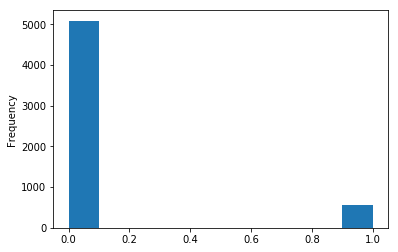

In [8]:
# Histogram for target variable
df['sars_cov_2_exam_result'].plot.hist()

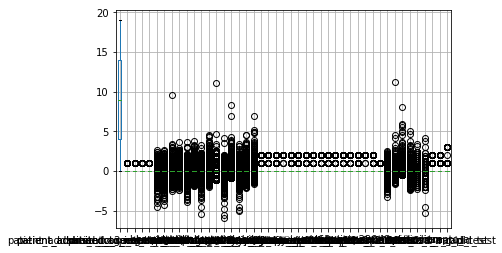

In [9]:
df.boxplot()

Correlation =  0.9684465668095572


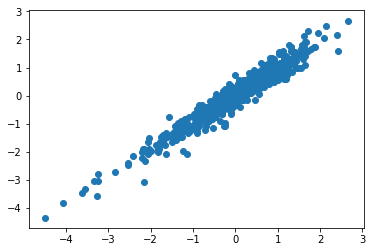

In [11]:
# hematocrit and hemoglobin
plt.scatter(df['hematocrit'],df['hemoglobin'])
print("Correlation = ", df['hematocrit'].corr(df['hemoglobin']))

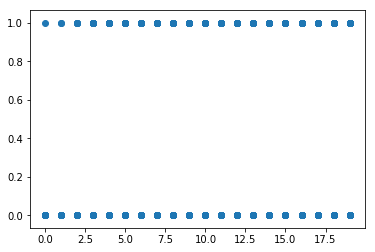

In [12]:
plt.scatter(df['patient_age_quantile'],df['sars_cov_2_exam_result'])

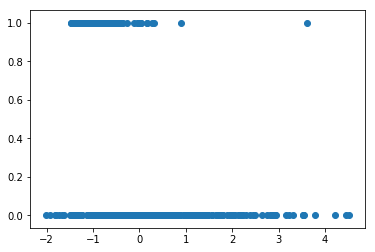

In [13]:
plt.scatter(df['leukocytes'],df['sars_cov_2_exam_result'])

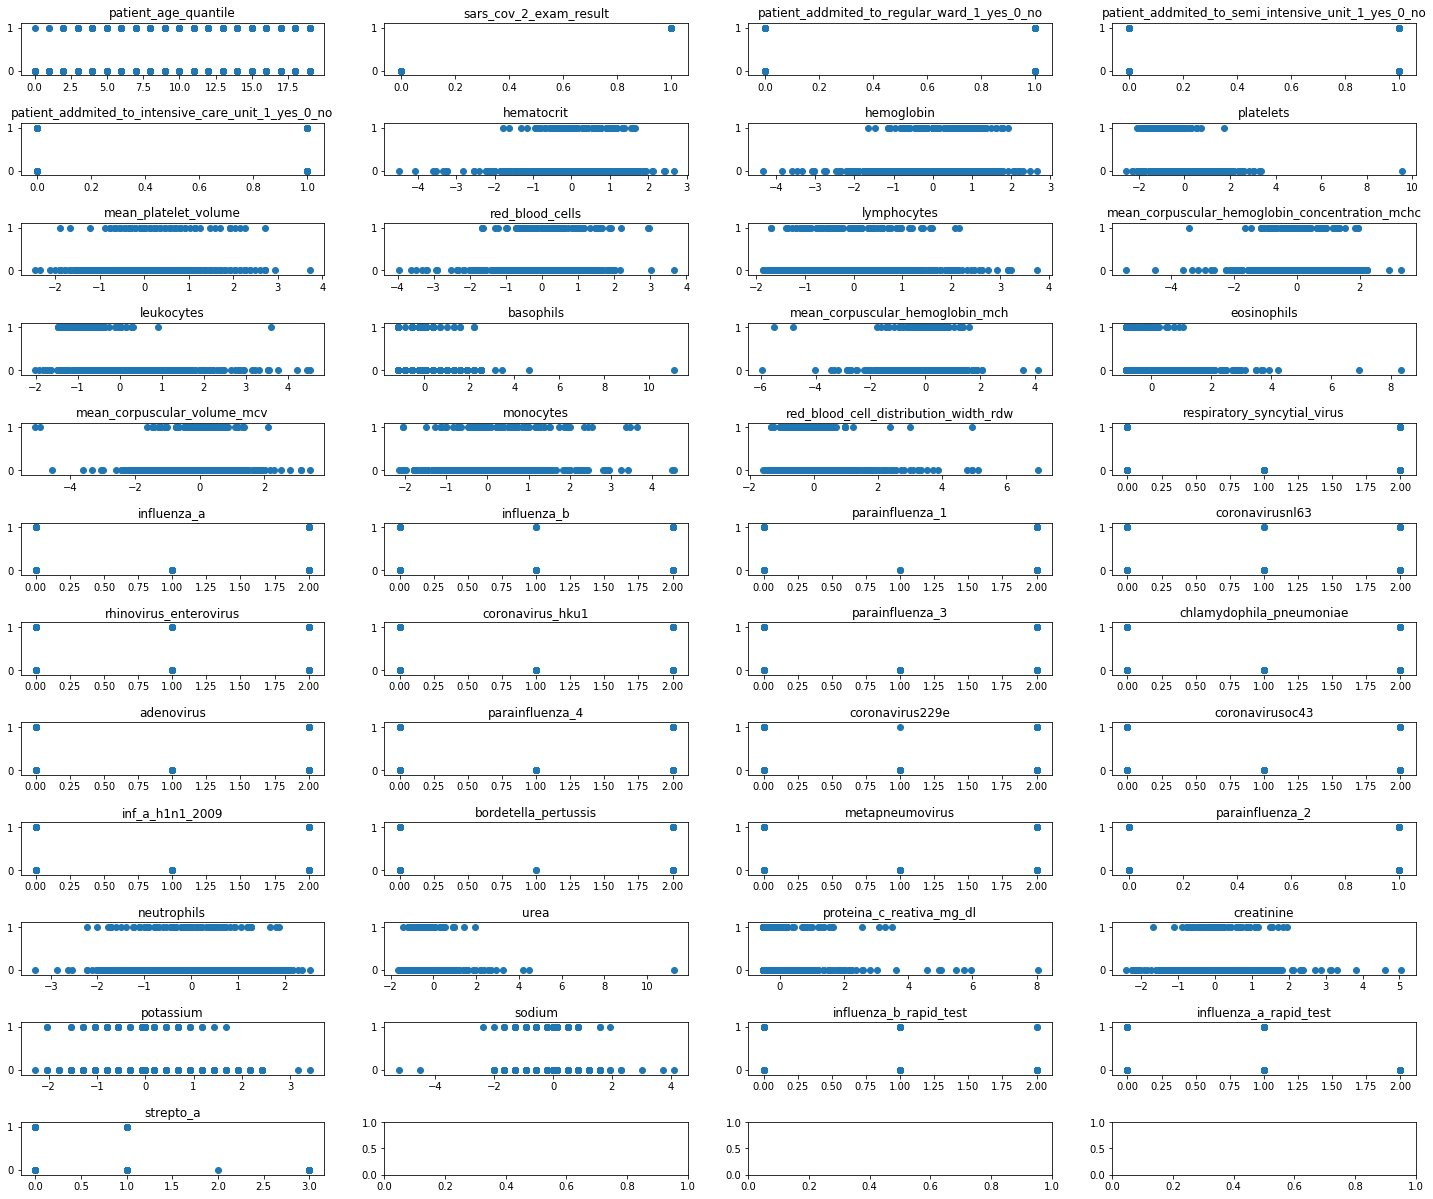

In [14]:
# Generically define how many plots along and across

ncols = 4
nrows = int(np.ceil(len(df.drop(['patient_id'], axis=1).columns) / (1.0*ncols)))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 20))
plt.subplots_adjust(left = 0.125,right = 0.9,bottom = 0.1,top = 0.9,wspace = 0.2,hspace = 0.9)

col_number = 0
for i in range(nrows):
    for j in range(ncols):
        
        ax = axes[i][j]
        if col_number < len(df.drop(['patient_id'], axis=1).columns):
            
            ax.scatter(df.drop(['patient_id'], axis=1)[df.drop(['patient_id'], axis=1).columns[col_number]],
                       df['sars_cov_2_exam_result'])
            ax.set_title(df.drop(['patient_id'], axis=1).columns[col_number])

        col_number += 1

plt.show()

# Feature distributions

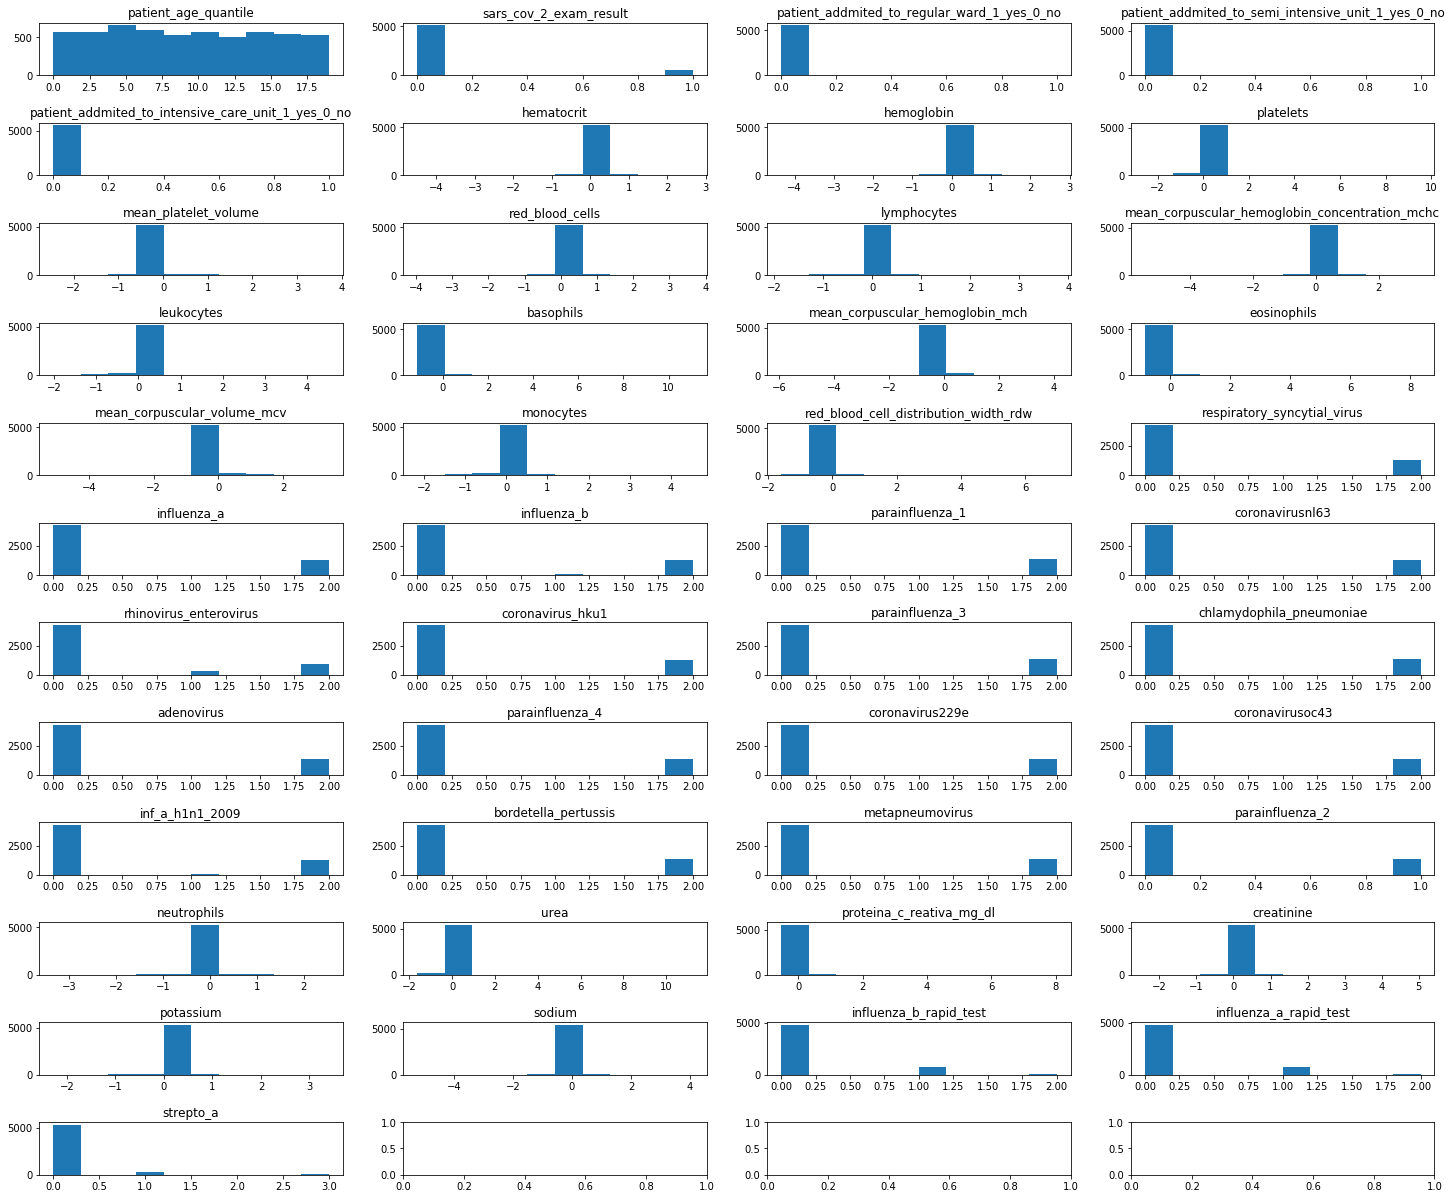

In [15]:
# Generically define how many plots along and across

ncols = 4
nrows = int(np.ceil(len(df.drop(['patient_id'], axis=1).columns) / (1.0*ncols)))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 20))
plt.subplots_adjust(left = 0.125,right = 0.9,bottom = 0.1,top = 0.9,wspace = 0.2,hspace = 0.9)

col_number = 0
for i in range(nrows):
    for j in range(ncols):
        
        ax = axes[i][j]
        if col_number < len(df.drop(['patient_id'], axis=1).columns):
            
            ax.hist(df.drop(['patient_id'], axis=1)[df.drop(['patient_id'], axis=1).columns[col_number]], 
                    range = [df.drop(['patient_id'], axis=1)[df.drop(['patient_id'], axis=1).columns[col_number]].min(),
                             df.drop(['patient_id'], axis=1)[df.drop(['patient_id'], axis=1).columns[col_number]].max()])
            ax.set_title(df.drop(['patient_id'], axis=1).columns[col_number])

        col_number += 1

plt.show()

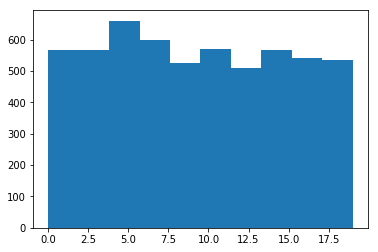

In [19]:
# Distribution of age_quantile
plt.hist(df['patient_age_quantile'])
plt.show()

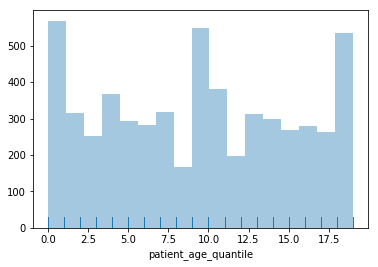

In [20]:
sns.distplot(df['patient_age_quantile'],kde=False, rug=True)

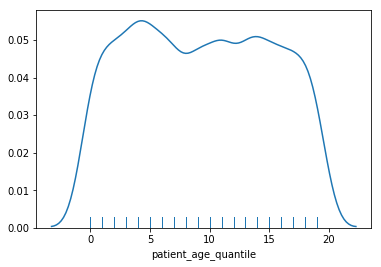

In [21]:
sns.distplot(df['patient_age_quantile'], hist=False, rug=True);

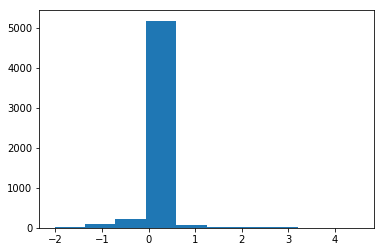

In [23]:
# Distribution of leukocytes
plt.hist(df['leukocytes'])
plt.show()

#  Summary Stats

In [24]:
# Summary stats

print(df.describe())

       patient_age_quantile  sars_cov_2_exam_result  \
count           5644.000000             5644.000000   
mean               9.318391                0.098866   
std                5.777903                0.298509   
min                0.000000                0.000000   
25%                4.000000                0.000000   
50%                9.000000                0.000000   
75%               14.000000                0.000000   
max               19.000000                1.000000   

       patient_addmited_to_regular_ward_1_yes_0_no  \
count                                  5644.000000   
mean                                      0.013997   
std                                       0.117489   
min                                       0.000000   
25%                                       0.000000   
50%                                       0.000000   
75%                                       0.000000   
max                                       1.000000   

       patient_ad

#  Split dataset 

In [25]:
# Split the dataset:
# Create a target df
target = df['sars_cov_2_exam_result']

# Create a features df
features = df.drop(['patient_id', 'sars_cov_2_exam_result'], axis=1)


# Split into train and test
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.20, random_state=21)



print("The shapes of each of these datasets are as follows: ")
print("\t\t features_train = ", features_train.shape)
print("\t\t target_train = ", target_train.shape)
print("\t\t features_test = ", features_test.shape)
print("\t\t target_test = ", target_test.shape)

The shapes of each of these datasets are as follows: 
		 features_train =  (4515, 44)
		 target_train =  (4515,)
		 features_test =  (1129, 44)
		 target_test =  (1129,)


# Feature Selection using RFC

C:\Users\av2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Features sorted by their score:
[(0.2863668966751022, 'patient_age_quantile'), (0.07152437983257949, 'patient_addmited_to_regular_ward_1_yes_0_no'), (0.06839937560365932, 'leukocytes'), (0.053424669956070536, 'platelets'), (0.04009203840231656, 'red_blood_cells'), (0.03670759259237848, 'eosinophils'), (0.02993527476558115, 'proteina_c_reativa_mg_dl'), (0.029803137375021986, 'monocytes'), (0.02809674621831367, 'mean_platelet_volume'), (0.027781602590046965, 'red_blood_cell_distribution_width_rdw'), (0.02705209170286475, 'hemoglobin'), (0.023983405428947013, 'creatinine'), (0.022627731720046153, 'urea'), (0.02182425519508841, 'sodium'), (0.021459611690190467, 'strepto_a'), (0.019429548790577865, 'mean_corpuscular_volume_mcv'), (0.01938954333067618, 'lymphocytes'), (0.01793681379258681, 'hematocrit'), (0.014907794505983332, 'potassium'), (0.014738744007756923, 'basophils'), (0.014505361280117517, 'rhinovirus_enterovirus'), (0.013940781337120126, 'neutrophils'), (0.013811892399065653, 'mea

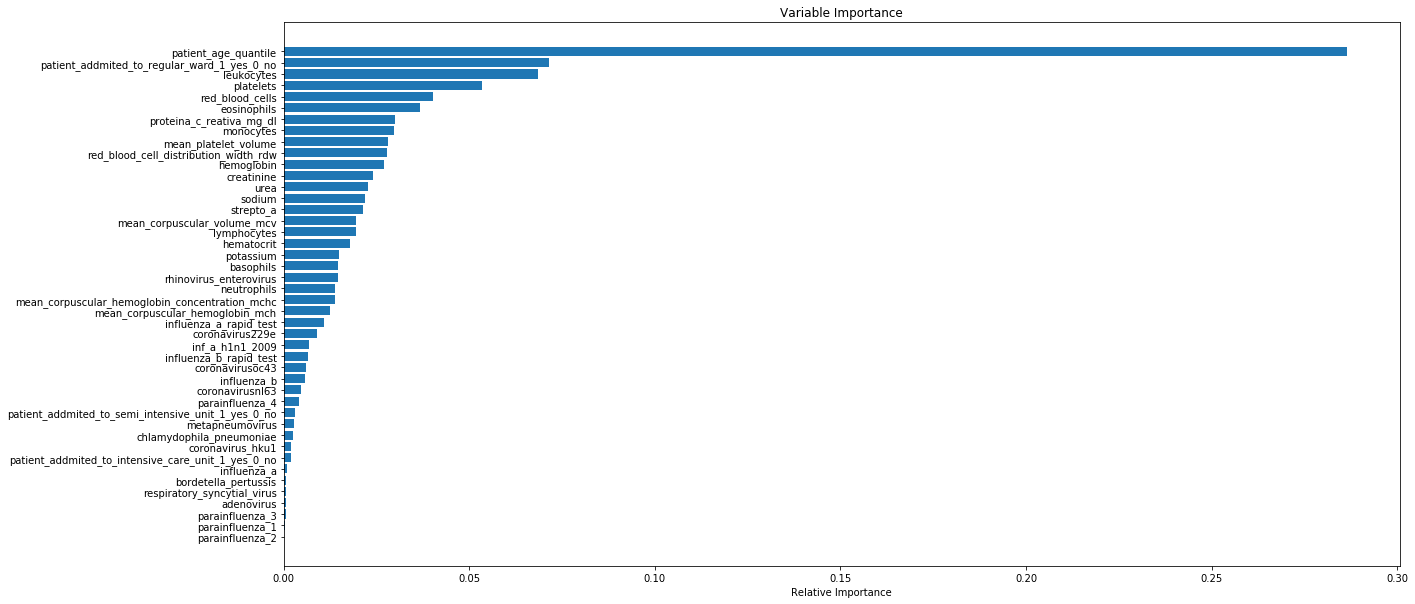

In [26]:
# Using RandomClassifier to do feature selection 
# Build the model
rfc = RandomForestClassifier(random_state=0)

# Fit the model
rfc.fit(features_train, target_train)

names = features_train.columns

# Print the results
print("Features sorted by their score:")
print(sorted(zip(rfc.feature_importances_, names), reverse=True))

# Isolate feature importances 
importance = rfc.feature_importances_

# Sort the feature importances 
sorted_importances = np.argsort(importance)

# Insert padding
padding = np.arange(len(names)) + 0.5

# Plot the data
plt.figure(figsize=(20,10))
plt.barh(padding, importance[sorted_importances], align='center')

# Customize the plot
plt.yticks(padding, names[sorted_importances])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")

# Show the plot
plt.show()

In [27]:
print(sum(sorted(rfc.feature_importances_, reverse=True)[0:20]))

imps = sorted(rfc.feature_importances_, reverse=True)
cumulative_imps = []
cumulative_imps.append(imps[0])

for i in range(1, len(imps)-1):
    cumulative_imps.append(cumulative_imps[i-1]+imps[i])
    
print(cumulative_imps)

0.8754812541757883
[0.2863668966751022, 0.35789127650768165, 0.426290652111341, 0.4797153220674115, 0.5198073604697281, 0.5565149530621065, 0.5864502278276876, 0.6162533652027096, 0.6443501114210233, 0.6721317140110702, 0.6991838057139349, 0.723167211142882, 0.7457949428629281, 0.7676191980580166, 0.7890788097482071, 0.808508358538785, 0.8278979018694612, 0.845834715662048, 0.8607425101680314, 0.8754812541757883, 0.8899866154559057, 0.9039273967930259, 0.9177392891920916, 0.9301493742249477, 0.941044439150931, 0.9499341846215726, 0.9566578885082984, 0.9632927670305128, 0.9694351472847669, 0.9750845929109238, 0.9798200418189716, 0.9840061706638905, 0.9869202856032935, 0.9896491133389259, 0.9922295415302843, 0.9941593612024077, 0.9960755243466409, 0.996887955976094, 0.9976280202763886, 0.9983277725655896, 0.9988896415080418, 0.9994304910405619, 0.9998288846364523]


In [28]:
# Looking at the numbers and the graph above, we will drop any feature which has importance less than 0.015

less_important_features = []
for (x,y) in (sorted(zip(rfc.feature_importances_, names), reverse=True)):
    if(x < 0.015):
        less_important_features.append(y)

print("Columns that are being dropped because of less feature importance are: ")
print(less_important_features)
print("No. of columns dropped = ", len(less_important_features))


# Dropping the features:
features_train = features_train.drop(less_important_features, axis=1)
features_test = features_test.drop(less_important_features, axis=1)

Columns that are being dropped because of less feature importance are: 
['potassium', 'basophils', 'rhinovirus_enterovirus', 'neutrophils', 'mean_corpuscular_hemoglobin_concentration_mchc', 'mean_corpuscular_hemoglobin_mch', 'influenza_a_rapid_test', 'coronavirus229e', 'inf_a_h1n1_2009', 'influenza_b_rapid_test', 'coronavirusoc43', 'influenza_b', 'coronavirusnl63', 'parainfluenza_4', 'patient_addmited_to_semi_intensive_unit_1_yes_0_no', 'metapneumovirus', 'chlamydophila_pneumoniae', 'coronavirus_hku1', 'patient_addmited_to_intensive_care_unit_1_yes_0_no', 'influenza_a', 'bordetella_pertussis', 'respiratory_syncytial_virus', 'adenovirus', 'parainfluenza_3', 'parainfluenza_1', 'parainfluenza_2']
No. of columns dropped =  26


# Correlation Analysis

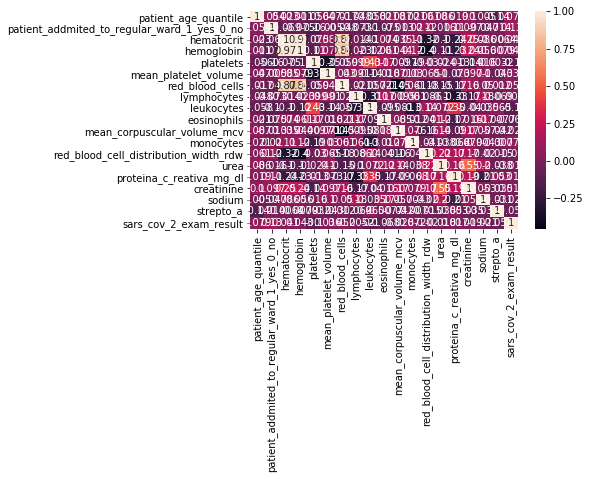

In [29]:
clean_df = features_train.join(target_train)

# calculate the correlation matrix
corr = clean_df.corr()

# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [30]:
# Remove one column for every two highly correlated columns

correlated_features = set()
can_be_removed = []

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.8:
            colname_i = corr.columns[i]
            colname_j = corr.columns[j]
            correlated_features.add((colname_i,colname_j))
            can_be_removed.append(colname_i)

print("The columns that are highly correlated are: ", correlated_features)
print("The columns that can be removed are: ", can_be_removed)
print("No. of columns dropped = ", len(can_be_removed))

# Dropping the features:
features_train = features_train.drop(can_be_removed, axis=1)
features_test = features_test.drop(can_be_removed, axis=1)

The columns that are highly correlated are:  {('red_blood_cells', 'hematocrit'), ('hemoglobin', 'hematocrit'), ('red_blood_cells', 'hemoglobin')}
The columns that can be removed are:  ['hemoglobin', 'red_blood_cells', 'red_blood_cells']
No. of columns dropped =  3


# Balancing the classes

In [31]:
# Feature selection before SMOTE (Synthetic Minority Oversampling TEchnique) is preferred 
# REF: (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3648438/)
# Because oversampling using SMOTE will violate the independence assumption of each of the sample in the datset

# In the SMOTE paper, they suggest to first use random undersampling to trim the no of samples in the minority class
# and then use SMOTE to oversample the minority class. 
# The combination of SMOTE and under-sampling performs better than plain under-sampling.

from collections import Counter
from numpy import where
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

counter = Counter(target_train)
print("Before everything: ", counter)

Using TensorFlow backend.


Before everything:  Counter({0: 4070, 1: 445})


In [32]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Undersample the majority class
undersample = RandomUnderSampler(random_state=42, sampling_strategy=0.15)
features_train_b, target_train_b = undersample.fit_resample(features_train, target_train)

counter = Counter(target_train_b)
print("After Undersampling: ", counter)

After Undersampling:  Counter({0: 2966, 1: 445})


In [33]:
# Oversample the minority class
oversample = SMOTE(random_state=42, sampling_strategy=0.75)
features_train_b, target_train_b = oversample.fit_resample(features_train_b, target_train_b)

counter = Counter(target_train_b)
print("After Oversampling", counter)

After Oversampling Counter({0: 2966, 1: 2224})


In [34]:
features_train, target_train = features_train_b, target_train_b

features_train = pd.DataFrame(data = features_train_b, 
                columns = features_test.columns)

#target_train = pd.DataFrame(data = target_train_b, 
#                columns = target_test.columns)


print("The shapes of each of these datasets are as follows: ")
print("\t\t features_train = ", features_train.shape)
print("\t\t target_train = ", target_train.shape)
print("\t\t features_test = ", features_test.shape)
print("\t\t target_test = ", target_test.shape)

The shapes of each of these datasets are as follows: 
		 features_train =  (5190, 16)
		 target_train =  (5190,)
		 features_test =  (1129, 16)
		 target_test =  (1129,)


# Linear Regression

In [35]:
LR = LinearRegression()
LR.fit(features_train, target_train)

probs = LR.predict(features_test)

target_pred_lir = []

for i in probs:
    if(i < 0.5):
        target_pred_lir.append(0)
    else:
        target_pred_lir.append(1)

# Linear Regression results:

RMSE =  0.41772083947808747
R2 Score =  -0.9372604696536824


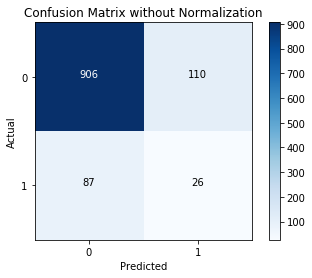

True Negatives:  906
False Positives:  110
False Negatives:  87
True Positives:  26
Accuracy 82.55%:
Precision 0.19
Recall 0.23
AUC 0.55
F1 Score 0.21


In [36]:
# RMSE:
rmse = math.sqrt(mean_squared_error(target_test,target_pred_lir))
print("RMSE = ", rmse)

# R2 Score
r2 = r2_score(target_test,target_pred_lir)
print("R2 Score = ",r2)

# Confusion matrix
cf = confusion_matrix(target_test, target_pred_lir)
cf

# Plotting the confusion matrix
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix without Normalization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(set(target_test))) # length of classes
class_labels = ['0','1']
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)

# Plotting text value inside cells
thresh = cf.max() / 2.
for i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
    plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

# Extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(target_test, target_pred_lir).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

# Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))

# Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

# Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

# AUC Score
auc = roc_auc_score(target_pred_lir, target_test)
print("AUC {:0.2f}".format(auc))


# F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}".format(f1))

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegressionCV

LR = LogisticRegressionCV(random_state=0)
LR.fit(features_train, target_train)

probs = LR.predict_proba(features_test)

target_pred_lor = []

for i in probs[:,1]:
    if(i < 0.5):
        target_pred_lor.append(0)
    else:
        target_pred_lor.append(1)

C:\Users\av2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


# Logistic Regression Results

RMSE =  0.4240343586192478
R2 Score =  -0.9962633265974494


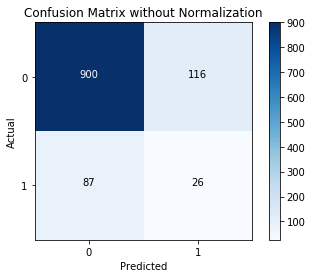

True Negatives:  900
False Positives:  116
False Negatives:  87
True Positives:  26
Accuracy 82.02%:
Precision 0.18
Recall 0.23
AUC 0.55
F1 Score 0.20


In [38]:
# RMSE:
rmse = math.sqrt(mean_squared_error(target_test,target_pred_lor))
print("RMSE = ", rmse)

# R2 Score
r2 = r2_score(target_test,target_pred_lor)
print("R2 Score = ",r2)

# Confusion matrix
cf = confusion_matrix(target_test, target_pred_lor)
cf

# Plotting the confusion matrix
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix without Normalization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(set(target_test))) # length of classes
class_labels = ['0','1']
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)

# Plotting text value inside cells
thresh = cf.max() / 2.
for i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
    plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

# Extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(target_test, target_pred_lor).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

# Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))

# Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

# Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

# AUC Score
auc = roc_auc_score(target_pred_lor, target_test)
print("AUC {:0.2f}".format(auc))

# F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}".format(f1))

# Decision trees

In [39]:
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(random_state=0), parameters, n_jobs=4)
clf.fit(X=features_train, y=target_train)
tree_model = clf.best_estimator_

probs = tree_model.predict_proba(features_test)

target_pred_dt = []

for i in probs[:,1]:
    if(i < 0.5):
        target_pred_dt.append(0)
    else:
        target_pred_dt.append(1)

C:\Users\av2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


# Decision trees Results

RMSE =  0.5206114821277907
R2 Score =  -2.009145704132116


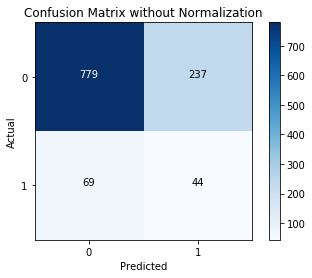

True Negatives:  779
False Positives:  237
False Negatives:  69
True Positives:  44
Accuracy 72.90%:
Precision 0.16
Recall 0.39
AUC 0.54
F1 Score 0.22


In [40]:
# RMSE:
rmse = math.sqrt(mean_squared_error(target_test,target_pred_dt))
print("RMSE = ", rmse)

# R2 Score
r2 = r2_score(target_test,target_pred_dt)
print("R2 Score = ",r2)

# Confusion matrix
cf = confusion_matrix(target_test, target_pred_dt)
cf

# Plotting the confusion matrix
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix without Normalization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(set(target_test))) # length of classes
class_labels = ['0','1']
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)

# Plotting text value inside cells
thresh = cf.max() / 2.
for i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
    plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

# Extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(target_test, target_pred_dt).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

# Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))

# Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

# Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

# AUC Score
auc = roc_auc_score(target_pred_dt, target_test)
print("AUC {:0.2f}".format(auc))

# F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}".format(f1))

# Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(features_train, target_train)
probs = gnb.predict_proba(features_test)

target_pred_gnb = []

for i in probs[:,1]:
    if(i < 0.5):
        target_pred_gnb.append(0)
    else:
        target_pred_gnb.append(1)

# Naive Bayes Results

RMSE =  0.8783388782921856
R2 Score =  -7.56524806633684


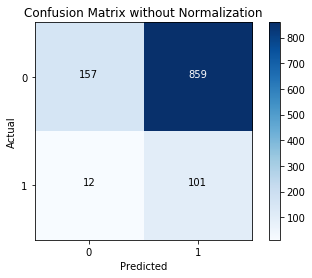

True Negatives:  157
False Positives:  859
False Negatives:  12
True Positives:  101
Accuracy 22.85%:
Precision 0.11
Recall 0.89
AUC 0.52
F1 Score 0.19


In [42]:
# RMSE:
rmse = math.sqrt(mean_squared_error(target_test,target_pred_gnb))
print("RMSE = ", rmse)

# R2 Score
r2 = r2_score(target_test,target_pred_gnb)
print("R2 Score = ",r2)

# Confusion matrix
cf = confusion_matrix(target_test, target_pred_gnb)
cf

# Plotting the confusion matrix
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix without Normalization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(set(target_test))) # length of classes
class_labels = ['0','1']
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)

# Plotting text value inside cells
thresh = cf.max() / 2.
for i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
    plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

# Extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(target_test, target_pred_gnb).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

# Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))

# Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

# Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

# AUC Score
auc = roc_auc_score(target_pred_gnb, target_test)
print("AUC {:0.2f}".format(auc))

# F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}".format(f1))

# XGBoost

In [43]:
train = features_train
target = 'sars_cov_2_exam_result'


param_dist = {
              'learning_rate':0.1,
              'n_estimators':100,
              # max_depth represents the depth of each tree
              'max_depth':4, 
              'random_state':0,
              'subsample':1.0,
              'verbose':0
            }

gbm0 = GradientBoostingClassifier(**param_dist)
gbm0.fit(features_train, target_train)

cv_score = cross_validate(gbm0, features_train, target_train, cv=5, scoring='roc_auc')

#feat_imp = pd.Series(gbm0.feature_importances_, features_train.columns).sort_values(ascending=False)
#feat_imp.plot(kind='bar', title='Feature Importances')
#plt.ylabel('Feature Importance Score')


probs = gbm0.predict_proba(features_test)

target_pred_gbm = []

for i in probs[:,1]:
    if(i < 0.5):
        target_pred_gbm.append(0)
    else:
        target_pred_gbm.append(1)

# XGBoost Results

RMSE =  0.5406422713261791
R2 Score =  -2.2451571319071837


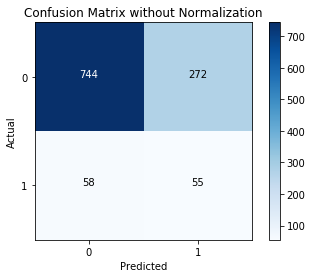

True Negatives:  744
False Positives:  272
False Negatives:  58
True Positives:  55
Accuracy 70.77%:
Precision 0.17
Recall 0.49
AUC 0.55
F1 Score 0.25


In [44]:
# RMSE:
rmse = math.sqrt(mean_squared_error(target_test,target_pred_gbm))
print("RMSE = ", rmse)

# R2 Score
r2 = r2_score(target_test,target_pred_gbm)
print("R2 Score = ",r2)
# Confusion matrix
cf = confusion_matrix(target_test, target_pred_gbm)
cf

# Plotting the confusion matrix
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix without Normalization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(set(target_test))) # length of classes
class_labels = ['0','1']
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)

# Plotting text value inside cells
thresh = cf.max() / 2.
for i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
    plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

# Extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(target_test, target_pred_gbm).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

# Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))

# Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

# Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

# AUC Score
auc = roc_auc_score(target_pred_gbm, target_test)
print("AUC {:0.2f}".format(auc))

# F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}".format(f1))


# Multi-Layer Perceptron Classifier

In [45]:

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

mlp = MLPClassifier(hidden_layer_sizes=(20,26,10), activation='relu', solver='adam', max_iter=800)
mlp.fit(features_train,target_train)

predict_train = mlp.predict(features_train)
predict_test = mlp.predict(features_test)


cv_score_mlp = cross_validate(mlp, features_train, target_train, cv=5, scoring='roc_auc')


probs = mlp.predict_proba(features_test)

target_pred_mlp = []

for i in probs[:,1]:
    if(i < 0.5):
        target_pred_mlp.append(0)
    else:
        target_pred_mlp.append(1)

[[2798  168]
 [1686  538]]
              precision    recall  f1-score   support

           0       0.62      0.94      0.75      2966
           1       0.76      0.24      0.37      2224

   micro avg       0.64      0.64      0.64      5190
   macro avg       0.69      0.59      0.56      5190
weighted avg       0.68      0.64      0.59      5190

RMSE =  0.3822918162508386
R2 Score =  -0.6225785659535918


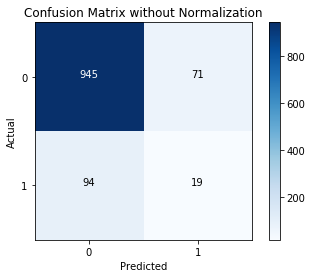

True Negatives:  945
False Positives:  71
False Negatives:  94
True Positives:  19
Accuracy 85.39%:
Precision 0.21
Recall 0.17
AUC 0.56
F1 Score 0.19


In [46]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(target_train,predict_train))
print(classification_report(target_train,predict_train))

# RMSE:
rmse = math.sqrt(mean_squared_error(target_test,target_pred_mlp))
print("RMSE = ", rmse)

# R2 Score
r2 = r2_score(target_test,target_pred_mlp)
print("R2 Score = ",r2)
# Confusion matrix
cf = confusion_matrix(target_test, target_pred_mlp)
cf

# Plotting the confusion matrix
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix without Normalization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(set(target_test))) # length of classes
class_labels = ['0','1']
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)

# Plotting text value inside cells
thresh = cf.max() / 2.
for i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
    plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

# Extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(target_test, target_pred_mlp).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

# Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))

# Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

# Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

# AUC Score
auc = roc_auc_score(target_pred_mlp, target_test)
print("AUC {:0.2f}".format(auc))

# F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}".format(f1))
